**(1) 데이터 가져오기**

In [148]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df_X = diabetes.data
df_y = diabetes.target

In [149]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

- age age in years  
- sex  
- bmi body mass index  : bmi는 단순 키, 몸무게로만 측정됨 > 근육량 등 배제되는게 많아서 의료적 가치가 상대적으로 낮음
- bp average blood pressure  
- s1 tc, total serum cholesterol  
- s2 ldl, low-density lipoproteins  
- s3 hdl, high-density lipoproteins  
- s4 tch, total cholesterol / HDL  
- s5 ltg, possibly log of serum triglycerides level  
- s6 glu, blood sugar level

In [150]:
import pandas as pd

df = pd.DataFrame(diabetes['data'], index=diabetes['target'], columns=diabetes['feature_names'])
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
141.0,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
178.0,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
104.0,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
132.0,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
220.0,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [151]:
import numpy as np

df_X_drop_bmi = df.drop('bmi', axis=1)
df_X_drop_bmi = np.array(df_X_drop_bmi)

**(2, 3) 모델에 입력할 데이터 X, y 준비하기**

In [152]:
print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


In [153]:
print(df_X_drop_bmi.shape)

(442, 9)


**(4) train, test 분리하기**

In [154]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=41)


**(5) 모델 준비하기**

In [155]:
# w, b 준비
import numpy as np
w = np.random.rand(10)
b = np.random.rand()
print('w : ', w)
print('b : ', b)

def model(X, w, b):
  predictions = 0
  for i in range(10):
    predictions += X[:, i] * w[i]
  predictions += b
  return predictions

w :  [0.37160288 0.54746956 0.33249107 0.0901735  0.34665244 0.97703453
 0.51605524 0.12077276 0.88881742 0.01937248]
b :  0.2264960994890849


**(6) 손실함수 loss 정의하기**

In [156]:
def MSE(x, y):
  mse = ((x - y)**2).mean()
  return mse

def loss(X, w, b, y):
    predictions = model(X, w, b)
    L = MSE(predictions, y)
    return L

**(7) gradient 함수 구현하기**

In [157]:
def gradient(X, w, b, y):
  n = len(y)
  y_pred = model(X, w, b)
  dw = 1/n * 2 * X.T.dot(y_pred - y)
  db = 2 * (y_pred - y).mean()
  return dw, db

**(8, 9) learning rate 설정하고 모델 학습하기**

In [158]:
learning_rate = 0.05
losses = []

for i in range(1, 20001):
  dw, db = gradient(X_train, w, b, y_train)
  w -= learning_rate * dw
  b -= learning_rate * db
  L = loss(X_train, w, b, y_train)
  losses.append(L)
  if i % 100 == 0:
    print('Iteration {} : Loss {}'.format(i, L))

Iteration 100 : Loss 5550.904837092705
Iteration 200 : Loss 5255.559446366673
Iteration 300 : Loss 5002.673906849101
Iteration 400 : Loss 4785.552058406466
Iteration 500 : Loss 4598.583881513982
Iteration 600 : Loss 4437.06787489554
Iteration 700 : Loss 4297.062559996882
Iteration 800 : Loss 4175.262321737841
Iteration 900 : Loss 4068.8935940307915
Iteration 1000 : Loss 3975.628053376384
Iteration 1100 : Loss 3893.5100312369677
Iteration 1200 : Loss 3820.8958134698423
Iteration 1300 : Loss 3756.4028776111663
Iteration 1400 : Loss 3698.8674385544077
Iteration 1500 : Loss 3647.3089404606326
Iteration 1600 : Loss 3600.900356179026
Iteration 1700 : Loss 3558.943342239233
Iteration 1800 : Loss 3520.8474536171584
Iteration 1900 : Loss 3486.1127530000103
Iteration 2000 : Loss 3454.3152583875262
Iteration 2100 : Loss 3425.0947640775544
Iteration 2200 : Loss 3398.144646332224
Iteration 2300 : Loss 3373.2033287608397
Iteration 2400 : Loss 3350.047135739379
Iteration 2500 : Loss 3328.484306729642

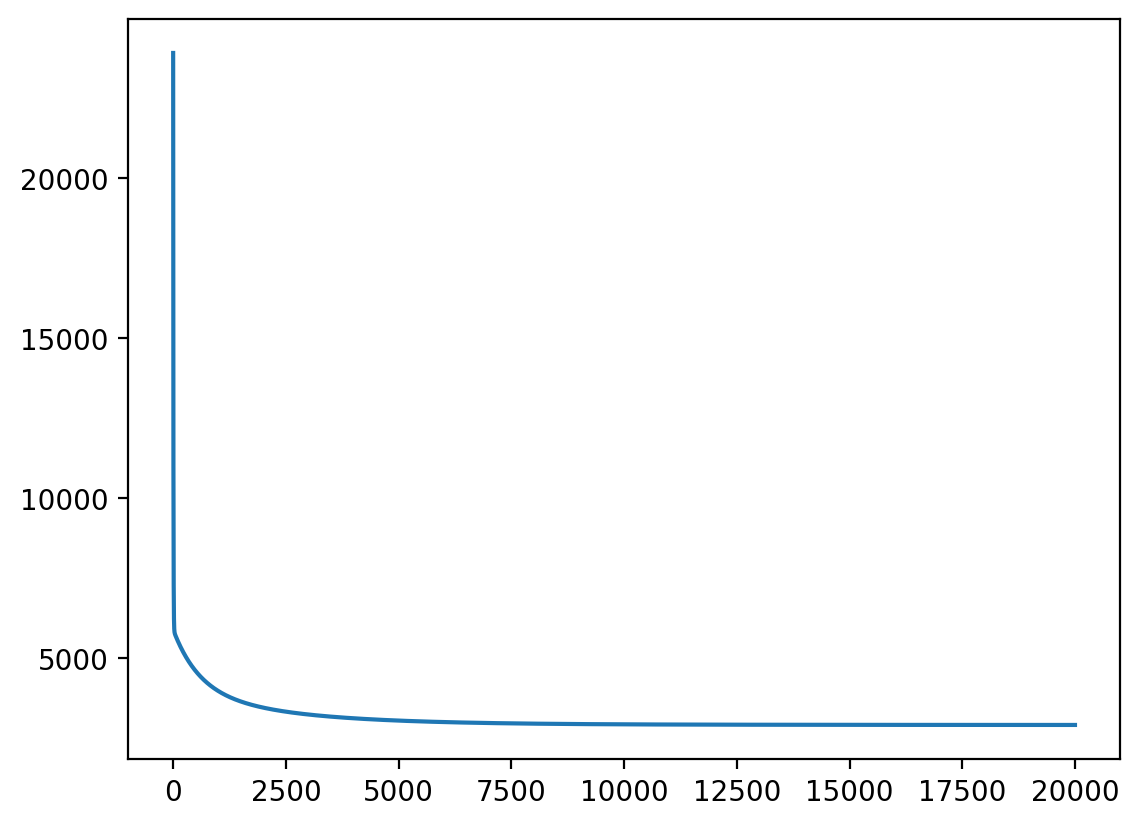

In [159]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()


In [165]:
# # bmi 제외하고 모델 돌려보기

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(df_X_drop_bmi, df_y, test_size=0.2, random_state=41)

# # w, b 준비
# import numpy as np
# w = np.random.rand(9)
# b = np.random.rand()
# print('w : ', w)
# print('b : ', b)

# def model(X, w, b):
#   predictions = 0
#   for i in range(9):
#     predictions += X[:, i] * w[i]
#     predictions += b
#     return predictions


# learning_rate = 0.05
# losses = []

# for i in range(1, 20001):
#   dw, db = gradient(X_train, w, b, y_train)
#   w -= learning_rate * dw
#   b -= learning_rate * db
#   L = loss(X_train, w, b, y_train)
#   losses.append(L)
#   if i % 100 == 0:
#     print('Iteration {} : Loss {}'.format(i, L))

-> bmi 안 줄인게 loss가 더 작게나와서 위에 걸로 진행

**(10) test 데이터에 대한 성능 확인**

In [161]:
prediction = model(X_test, w, b)
mse = loss(X_test, w, b, y_test)
mse

2850.5958949668957

**(11) 정답 데이터와 예측 데이터 시각화**

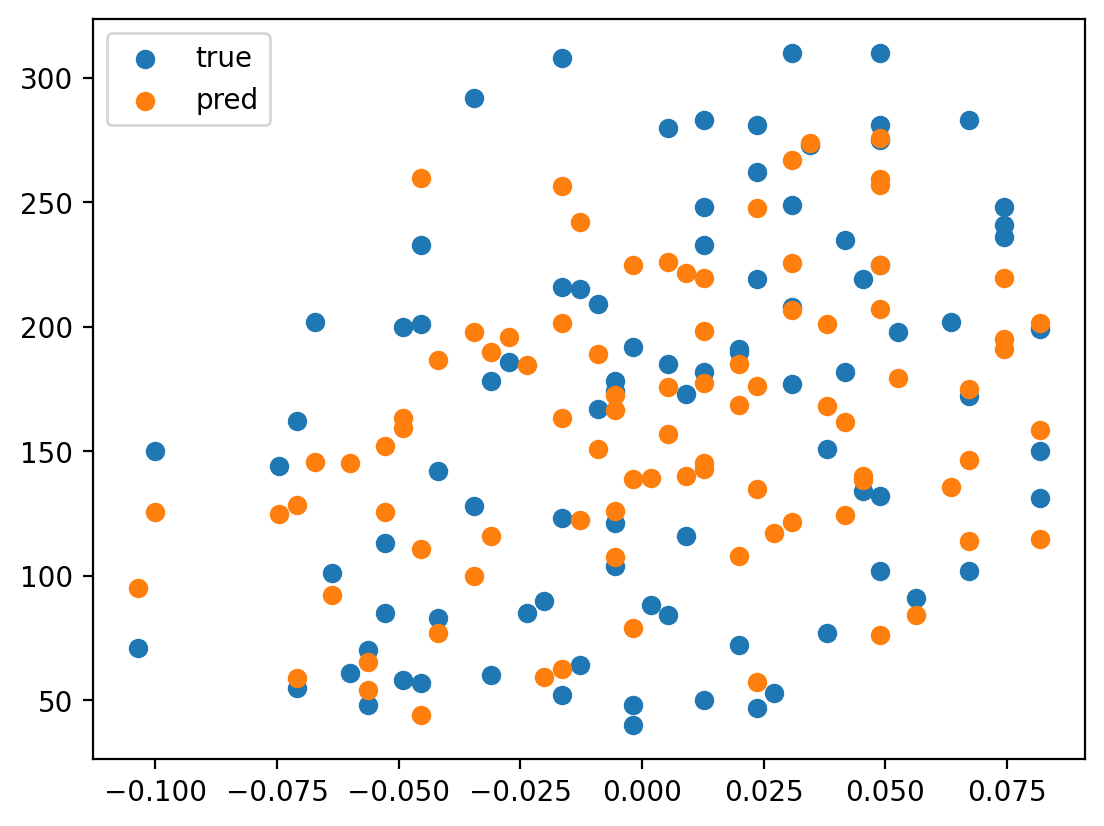

In [162]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 

plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], prediction, label="pred")
plt.legend()
plt.show()